In [1]:
import qiskit
from qiskit import * 
from qiskit.visualization import plot_histogram


C:\Users\ga05y\AppData\Local\Temp\ipykernel_16992\810781213.py:1: FutureWarning: The `qiskit` package is not installed, only `qiskit-terra` is installed. Starting in Qiskit 1.0.0 only the `qiskit` package will be published. Migrate any requirements files still using `qiskit-terra` to use `qiskit` instead. See https://qisk.it/1-0-packaging-migration for more detail.
  import qiskit


In [2]:
# for factorising 35
qc = QuantumCircuit(10,6)
for i in range(6):
    qc.h(i)
qc.x(6)
qc.x(8)
qc.x(9)
qc.h(9)
qc.draw()
    

    

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤     
q_3: ┤ H ├─────
     ├───┤     
q_4: ┤ H ├─────
     ├───┤     
q_5: ┤ H ├─────
     ├───┤     
q_6: ┤ X ├─────
     └───┘     
q_7: ──────────
     ┌───┐     
q_8: ┤ X ├─────
     ├───┤┌───┐
q_9: ┤ X ├┤ H ├
     └───┘└───┘
c: 6/══════════

In [3]:
# oracle for factorising 35
cq = QuantumCircuit(10)
for i in range(6):
    cq.x(i)
cq.x(7)
cq.mcx([0,1,2,3,4,5,6,7,8],9)
for i in range(6):
    cq.x(i)
cq.x(7)
cq.draw()
    

    
        
    

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     ├───┤  │  ├───┤
q_1: ┤ X ├──■──┤ X ├
     ├───┤  │  ├───┤
q_2: ┤ X ├──■──┤ X ├
     ├───┤  │  ├───┤
q_3: ┤ X ├──■──┤ X ├
     ├───┤  │  ├───┤
q_4: ┤ X ├──■──┤ X ├
     ├───┤  │  ├───┤
q_5: ┤ X ├──■──┤ X ├
     └───┘  │  └───┘
q_6: ───────■───────
     ┌───┐  │  ┌───┐
q_7: ┤ X ├──■──┤ X ├
     └───┘  │  └───┘
q_8: ───────■───────
          ┌─┴─┐     
q_9: ─────┤ X ├─────
          └───┘

In [4]:
# diffuser circuit for factorising 35
c = QuantumCircuit(10)
for i in range(6):
    c.h(i)
    c.x(i)
c.mcx([0,1,2,3,4,5],9)
for i in range(6):
    c.x(i)
    c.h(i)
c.draw()


    
    
    

┌───┐┌───┐     ┌───┐┌───┐
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_3: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_4: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_5: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     └───┘└───┘  │  └───┘└───┘
q_6: ────────────┼────────────
                 │            
q_7: ────────────┼────────────
                 │            
q_8: ────────────┼────────────
               ┌─┴─┐          
q_9: ──────────┤ X ├──────────
               └───┘

In [5]:
# conversion of oracle and diffuser as gates
gate1 = cq.to_gate()
gate1.label = "Oracle"
gate2 = c.to_gate()
gate2.label = "Diffuser"
for i in range(6):
    qc.append(gate1,list(range(0,10)))
    qc.append(gate2,list(range(0,10)))




C:\Users\ga05y\AppData\Local\Temp\ipykernel_16992\3618109945.py:4: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')
C:\Users\ga05y\AppData\Local\Temp\ipykernel_16992\3618109945.py:5: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  counts = execute(qc,backend=simulator,shots=1000).result().get_counts()


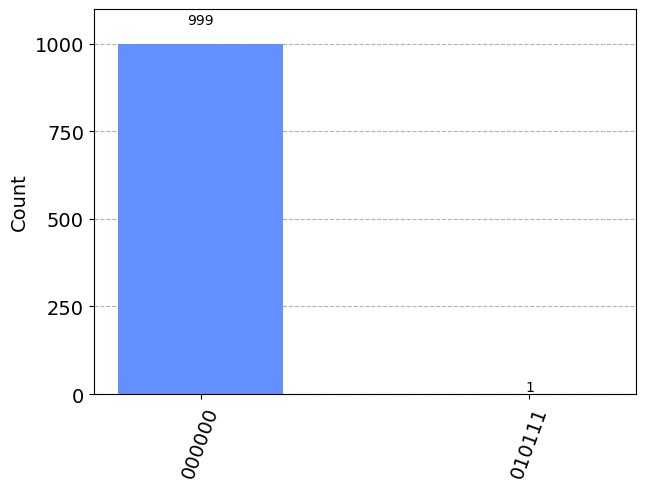

In [6]:
# measure the qubits and plot it
for i in range(6):
    qc.measure(i,i)
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc,backend=simulator,shots=1000).result().get_counts()
plot_histogram(counts)

In [7]:
# for factorising 115
p = QuantumCircuit(11,5)
for i in range(5):
    p.h(i)
p.x(6)
p.x(9)
p.x(10)
p.h(10)
p.draw()



┌───┐     
 q_0: ┤ H ├─────
      ├───┤     
 q_1: ┤ H ├─────
      ├───┤     
 q_2: ┤ H ├─────
      ├───┤     
 q_3: ┤ H ├─────
      ├───┤     
 q_4: ┤ H ├─────
      └───┘     
 q_5: ──────────
      ┌───┐     
 q_6: ┤ X ├─────
      └───┘     
 q_7: ──────────
                
 q_8: ──────────
      ┌───┐     
 q_9: ┤ X ├─────
      ├───┤┌───┐
q_10: ┤ X ├┤ H ├
      └───┘└───┘
 c: 5/══════════

In [8]:
# oracle for factorising 115
y = QuantumCircuit(11)
for i in range(5):
    if i ==1 or i==2:
        continue
    else:
        y.x(i)
for i in range(5,10):
    if i == 6 or i ==9:
        continue
    else:
        y.x(i)
y.mcx([0,1,2,3,4,5,6,7,8,9],10)
for i in range(5):
    if i ==1 or i==2:
        continue
    else:
        y.x(i)
for i in range(5,10):
    if i == 6 or i == 9:
        continue
    else:
        y.x(i)
y.draw()

    


┌───┐     ┌───┐
 q_0: ┤ X ├──■──┤ X ├
      └───┘  │  └───┘
 q_1: ───────■───────
             │       
 q_2: ───────■───────
      ┌───┐  │  ┌───┐
 q_3: ┤ X ├──■──┤ X ├
      ├───┤  │  ├───┤
 q_4: ┤ X ├──■──┤ X ├
      ├───┤  │  ├───┤
 q_5: ┤ X ├──■──┤ X ├
      └───┘  │  └───┘
 q_6: ───────■───────
      ┌───┐  │  ┌───┐
 q_7: ┤ X ├──■──┤ X ├
      ├───┤  │  ├───┤
 q_8: ┤ X ├──■──┤ X ├
      └───┘  │  └───┘
 q_9: ───────■───────
           ┌─┴─┐     
q_10: ─────┤ X ├─────
           └───┘

In [9]:
# diffuser for factorising 115
z = QuantumCircuit(11)
for i in range(5):
    z.h(i)
    z.x(i)
z.mcx([0,1,2,3,4],10)
for i in range(5):
    z.x(i)
    z.h(i)
z.draw()

┌───┐┌───┐     ┌───┐┌───┐
 q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
      ├───┤├───┤  │  ├───┤├───┤
 q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
      ├───┤├───┤  │  ├───┤├───┤
 q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
      ├───┤├───┤  │  ├───┤├───┤
 q_3: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
      ├───┤├───┤  │  ├───┤├───┤
 q_4: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
      └───┘└───┘  │  └───┘└───┘
 q_5: ────────────┼────────────
                  │            
 q_6: ────────────┼────────────
                  │            
 q_7: ────────────┼────────────
                  │            
 q_8: ────────────┼────────────
                  │            
 q_9: ────────────┼────────────
                ┌─┴─┐          
q_10: ──────────┤ X ├──────────
                └───┘

In [10]:
# conversion of oracle and diffuser as gates
gate3 = y.to_gate()
gate3.label = "Oracle"
gate4 = z.to_gate()
gate4.label = "Diffuser"
for i in range(4):
    p.append(gate3,list(range(0,11)))
    p.append(gate4,list(range(0,11)))


C:\Users\ga05y\AppData\Local\Temp\ipykernel_16992\1832258734.py:5: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(p, backend=simulator, shots=1000)


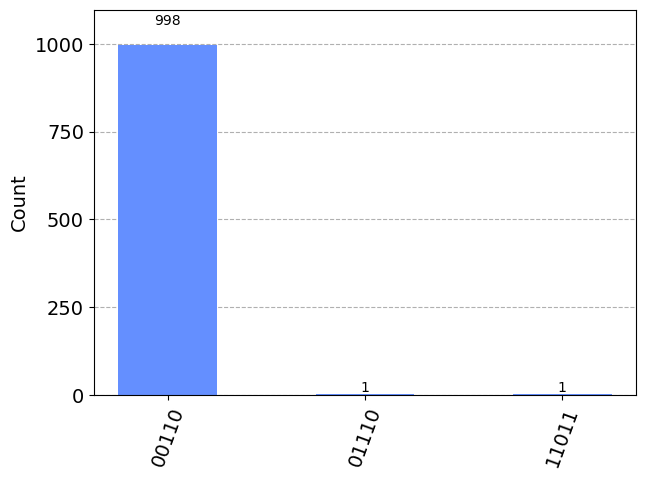

In [11]:
# measure the qubits and plot it
for i in range(5):
    p.measure(i,i)
simulator = Aer.get_backend('qasm_simulator')
job = execute(p, backend=simulator, shots=1000)
result = job.result()
s = result.get_counts(p)
plot_histogram(s)



In [12]:
# for factorising 893
l = QuantumCircuit(14,5)
for i in range(5):
    l.h(i)
l.x(7)
l.x(9)
l.x(12)
l.x(13)
l.h(13)
l.draw()



┌───┐     
 q_0: ┤ H ├─────
      ├───┤     
 q_1: ┤ H ├─────
      ├───┤     
 q_2: ┤ H ├─────
      ├───┤     
 q_3: ┤ H ├─────
      ├───┤     
 q_4: ┤ H ├─────
      └───┘     
 q_5: ──────────
                
 q_6: ──────────
      ┌───┐     
 q_7: ┤ X ├─────
      └───┘     
 q_8: ──────────
      ┌───┐     
 q_9: ┤ X ├─────
      └───┘     
q_10: ──────────
                
q_11: ──────────
      ┌───┐     
q_12: ┤ X ├─────
      ├───┤┌───┐
q_13: ┤ X ├┤ H ├
      └───┘└───┘
 c: 5/══════════

In [13]:
# oracle for factorising 893
m = QuantumCircuit(14)
m.x(4)
for i in range(5,13):
    if i==7 or i==9 or i==12:
        continue
    else:
        m.x(i)
m.mcx([0,1,2,3,4,5,6,7,8,9,10,11,12],13)
m.x(4)
for i in range(5,13):
    if i==7 or i==9 or i==12:
        continue
    else:
        m.x(i)
m.draw()






q_0: ───────■───────
             │       
 q_1: ───────■───────
             │       
 q_2: ───────■───────
             │       
 q_3: ───────■───────
      ┌───┐  │  ┌───┐
 q_4: ┤ X ├──■──┤ X ├
      ├───┤  │  ├───┤
 q_5: ┤ X ├──■──┤ X ├
      ├───┤  │  ├───┤
 q_6: ┤ X ├──■──┤ X ├
      └───┘  │  └───┘
 q_7: ───────■───────
      ┌───┐  │  ┌───┐
 q_8: ┤ X ├──■──┤ X ├
      └───┘  │  └───┘
 q_9: ───────■───────
      ┌───┐  │  ┌───┐
q_10: ┤ X ├──■──┤ X ├
      ├───┤  │  ├───┤
q_11: ┤ X ├──■──┤ X ├
      └───┘  │  └───┘
q_12: ───────■───────
           ┌─┴─┐     
q_13: ─────┤ X ├─────
           └───┘

In [14]:
# diffuser for factorising 893
n = QuantumCircuit(14)
for i in range(5):
    n.h(i)
    n.x(i)
n.mcx([0,1,2,3,4],13)
for i in range(5):
    n.x(i)
    n.h(i)
n.draw()


┌───┐┌───┐     ┌───┐┌───┐
 q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
      ├───┤├───┤  │  ├───┤├───┤
 q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
      ├───┤├───┤  │  ├───┤├───┤
 q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
      ├───┤├───┤  │  ├───┤├───┤
 q_3: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
      ├───┤├───┤  │  ├───┤├───┤
 q_4: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
      └───┘└───┘  │  └───┘└───┘
 q_5: ────────────┼────────────
                  │            
 q_6: ────────────┼────────────
                  │            
 q_7: ────────────┼────────────
                  │            
 q_8: ────────────┼────────────
                  │            
 q_9: ────────────┼────────────
                  │            
q_10: ────────────┼────────────
                  │            
q_11: ────────────┼────────────
                  │            
q_12: ────────────┼────────────
                ┌─┴─┐          
q_13: ──────────┤ X ├──────────
                └───┘

In [15]:
# conversion of oracle and diffuse as gates
gate5 = m.to_gate()
gate5.label = "Oracle"
gate6 = n.to_gate()
gate6.label = "Diffuser"
for i in range(4):
    l.append(gate5,list(range(0,14)))
    l.append(gate6,list(range(0,14)))


C:\Users\ga05y\AppData\Local\Temp\ipykernel_16992\2042447290.py:5: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  jobbb = execute(l, backend=simulator, shots=1000)


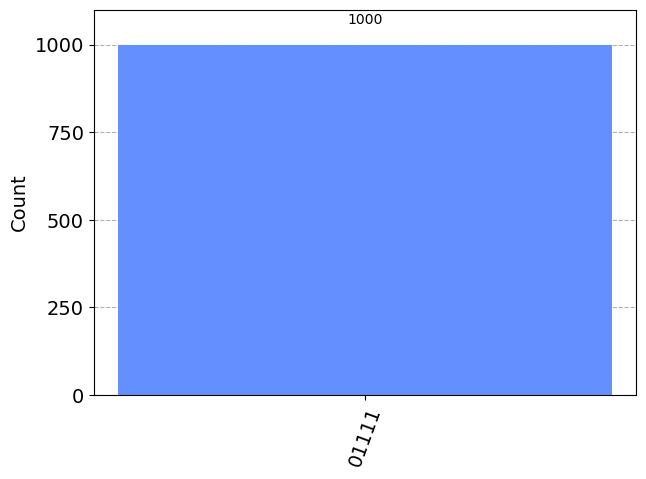

In [16]:
# measure the qubits and plot it
for i in range(5):
    l.measure(i,i)
simulator = Aer.get_backend('qasm_simulator')
jobbb = execute(l, backend=simulator, shots=1000)
res = jobbb.result()
k = res.get_counts(l)
plot_histogram(k) 
